# Problem Statement

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

Auto Insurance company is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering CLV as a parameter to classify loyal customers.


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df=pd.read_csv("Data/AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [6]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [7]:
numerical_cols.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [8]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

## Summary Statistics of Numerical features

In [9]:
numerical_cols.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


## Checking Null values

In [10]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data

## EDA

## Numerical Features

### CLV - Target variable analysis

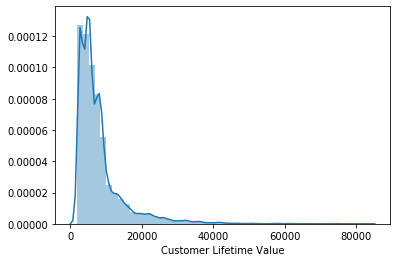

In [11]:
sns.distplot(df["Customer Lifetime Value"])
plt.show()

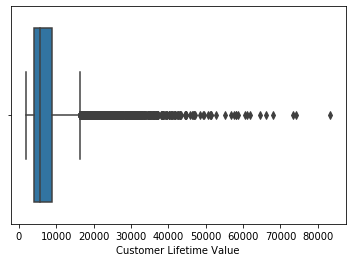

In [12]:
sns.boxplot(df["Customer Lifetime Value"])
plt.show()

In [13]:
df["Customer Lifetime Value"].skew()

3.032280259929985

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

### Income

**Univariate Analysis**

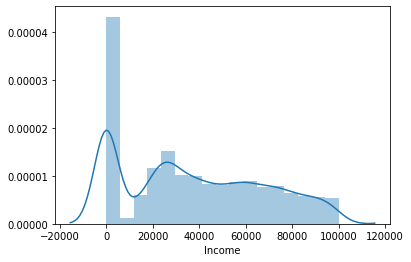

In [14]:
sns.distplot(df["Income"])
plt.show()

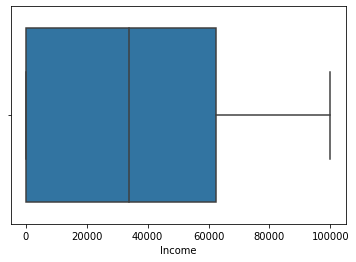

In [15]:
sns.boxplot(df["Income"])
plt.show()

**Bivariate Analysis**

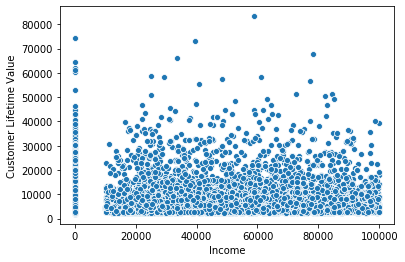

In [16]:
sns.scatterplot(df["Income"],df["Customer Lifetime Value"])
plt.show()

There is no linear relationship between income and CLV

### Monthly Premium Auto

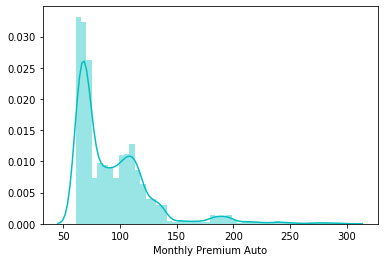

In [17]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

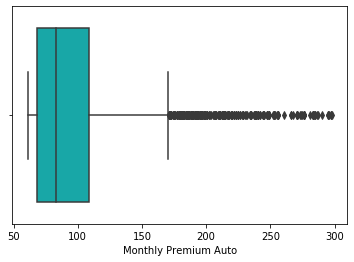

In [18]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

**Bivariate Analysis**

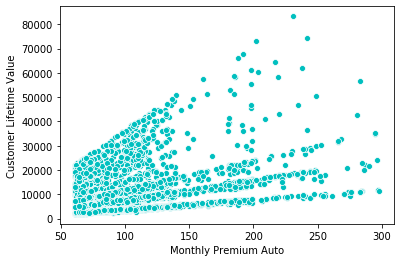

In [19]:
sns.scatterplot(df["Monthly Premium Auto"],df["Customer Lifetime Value"],color='c')
plt.show()

There is linear relationship between income and CLV

### Months Since Last Claim

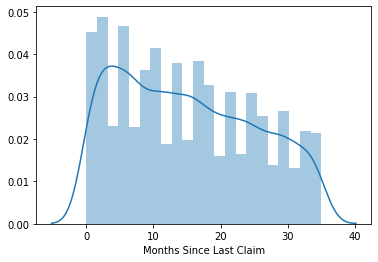

In [20]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

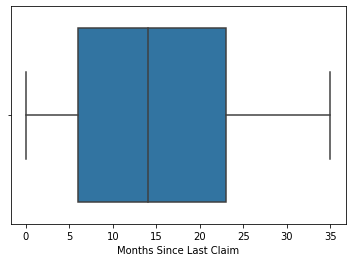

In [21]:
sns.boxplot(df["Months Since Last Claim"])
plt.show()

**Bivariate Analysis**

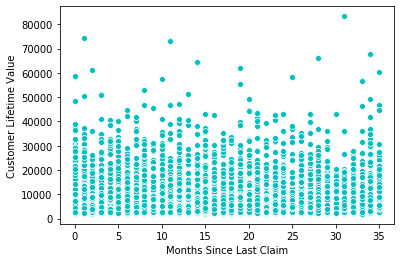

In [22]:
sns.scatterplot(df["Months Since Last Claim"],df["Customer Lifetime Value"],color='c')
plt.show()

There is no linear relationship

### Months Since Policy Inception

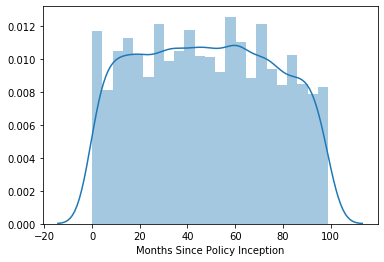

In [23]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

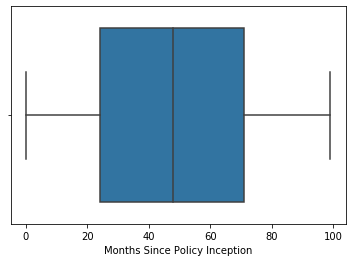

In [24]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

### Total claim amount

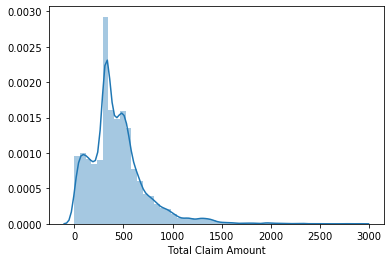

In [25]:
sns.distplot(df['Total Claim Amount'])
plt.show()

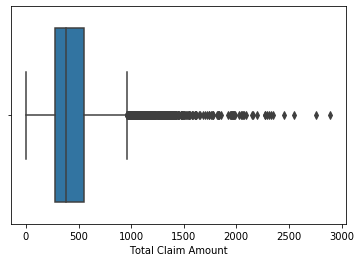

In [26]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

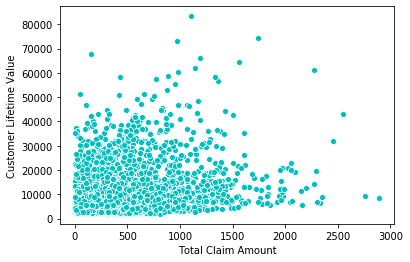

In [27]:
sns.scatterplot(df["Total Claim Amount"],df["Customer Lifetime Value"],color='c')
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

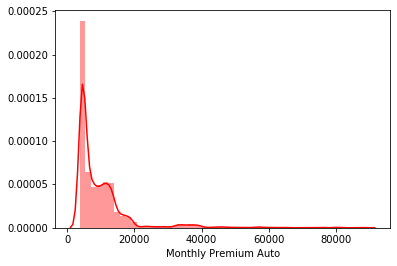

In [28]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

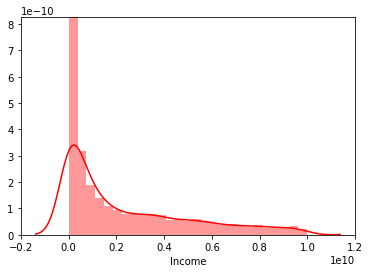

In [29]:
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

## Categorical variables

In [30]:
cat_cols = df.select_dtypes(include="object")

In [31]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [32]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [33]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [34]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [35]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [36]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
GS92994    1
LT98784    1
WL28610    1
IN67175    1
WJ88394    1
          ..
TC18805    1
EU68825    1
BH35482    1
HX17929    1
GL66847    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance

### State

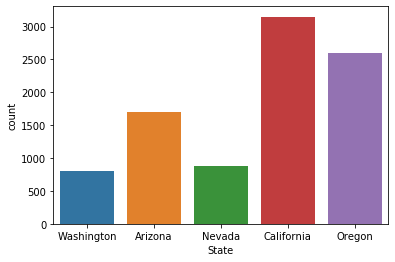

In [37]:
sns.countplot(df["State"])
plt.show()

Most number of people are residing in california

### Response

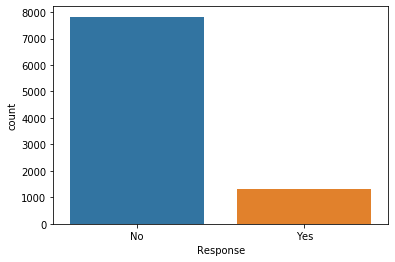

In [38]:
sns.countplot(df["Response"])
plt.show()

Its seems that less than 1400 customers have responded to the marketing calls

### Coverage

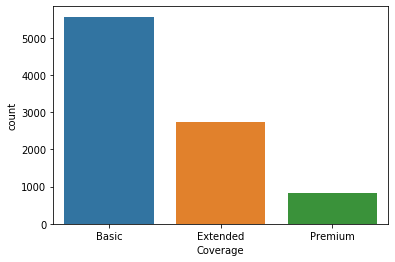

In [39]:
sns.countplot(df["Coverage"])
plt.show()

### Education

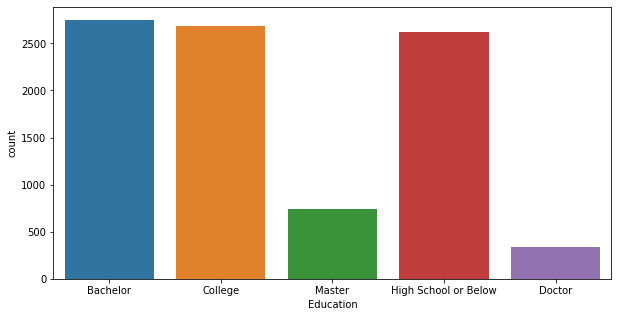

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

Most of the customers have either a bachelor or college degree

### EmploymentStatus

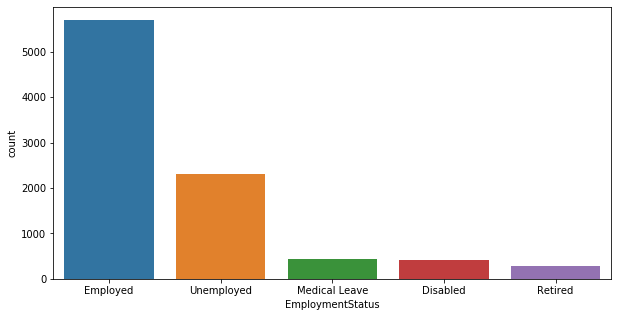

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
plt.show()

In [42]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

### Gender

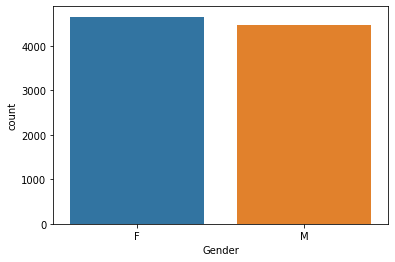

In [43]:
sns.countplot(df["Gender"])
plt.show()

### Location Code

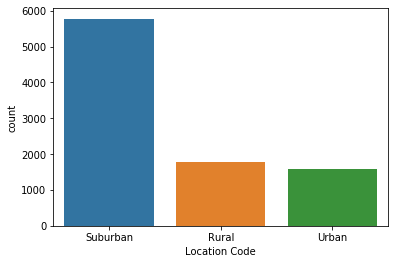

In [44]:
sns.countplot(df["Location Code"])
plt.show()

### Marital Status

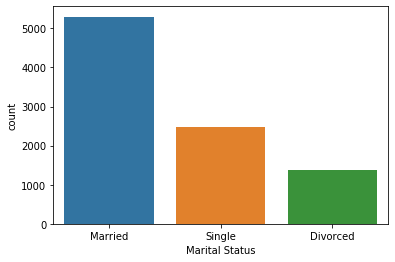

In [45]:
sns.countplot(df["Marital Status"])
plt.show()

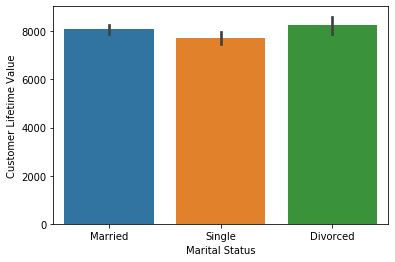

In [46]:

sns.barplot(df["Marital Status"],df["Customer Lifetime Value"])
plt.show()

### Policy Type

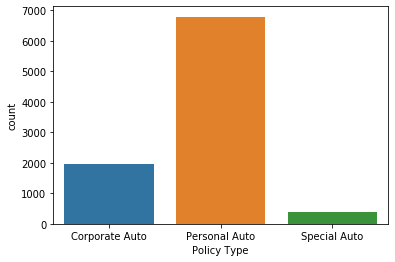

In [47]:
sns.countplot(df["Policy Type"])
plt.show()

### Policy

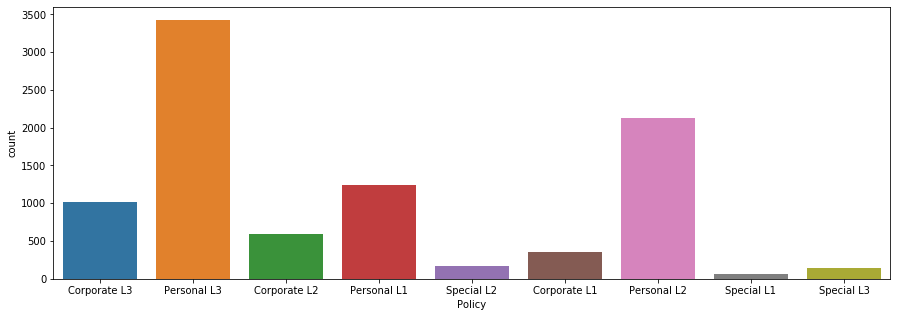

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(df["Policy"])
plt.show()

Personal L3 policy subcategory has the most number of customers

### Renew Offer type

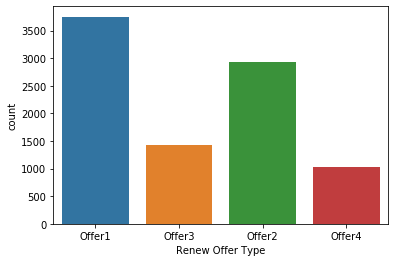

In [49]:
sns.countplot(df["Renew Offer Type"])
plt.show()

### Sales Channel

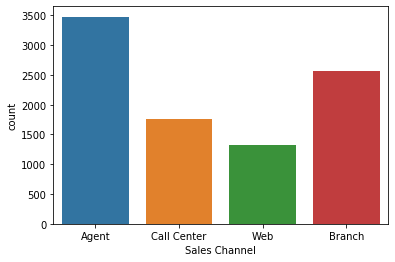

In [50]:
sns.countplot(df["Sales Channel"])
plt.show()

### Vehicle Class

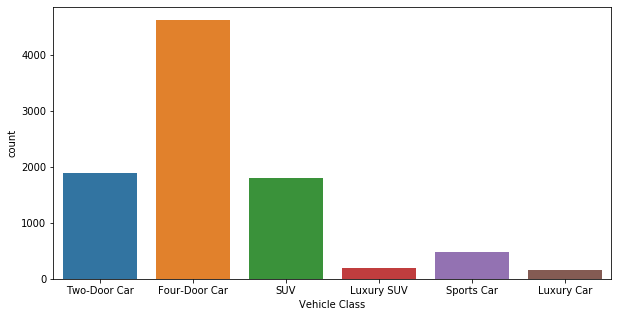

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

### Vehicle Size

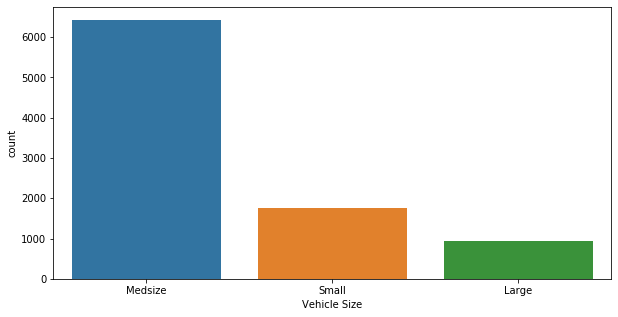

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Size"])
plt.show()

### Number of Open Complaints

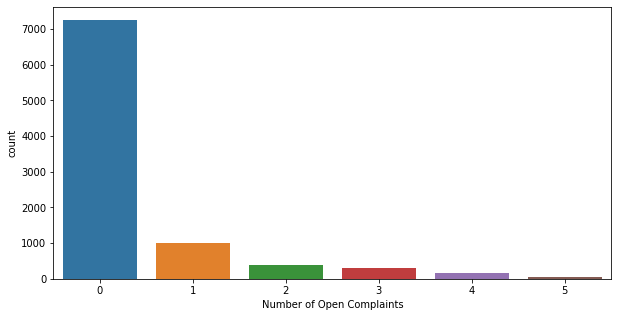

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Open Complaints"])
plt.show()

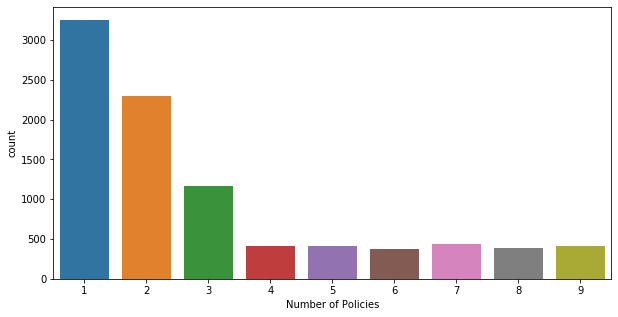

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Policies"])
plt.show()

In [55]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [56]:
df["Months"] = df["Effective To Date"].dt.month

In [57]:
df['Months'] = df['Months'].astype('object')

### Months

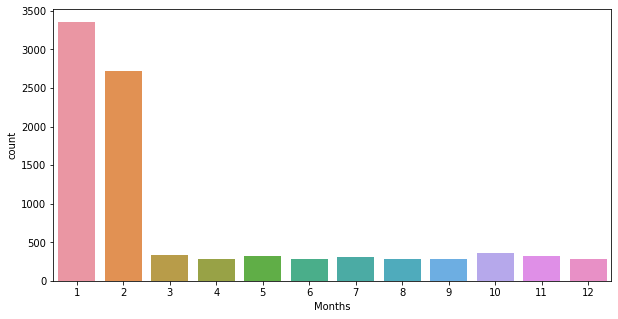

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df["Months"])
plt.show()

In [59]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [60]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

## HeatMap

In [61]:
heatmap = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

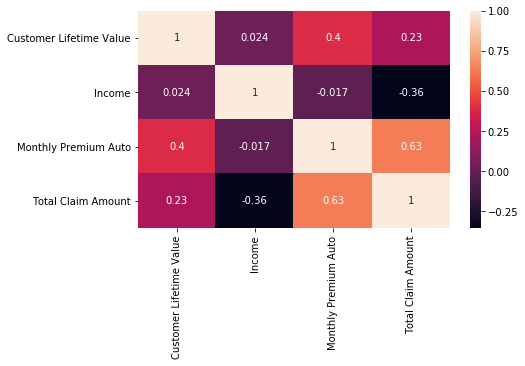

In [62]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.


## Statistical Significance

- H0:The null hypothesis of the test is the data is normally distributed
- HA:The data is not normally distributed

In [74]:
stats.shapiro(df['Customer Lifetime Value'])

(0.7033728361129761, 0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [67]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [70]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        ttest.append(i)
print("Anova:",anova)
print("TTest:",ttest)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


 H0, the distributions of both populations are equal
The alternative hypothesis H1 is that the distributions are not equal.    

In [77]:
yes=df[df['Response']=='No']['Customer Lifetime Value']
no=df[df['Response']=='Yes']['Customer Lifetime Value']

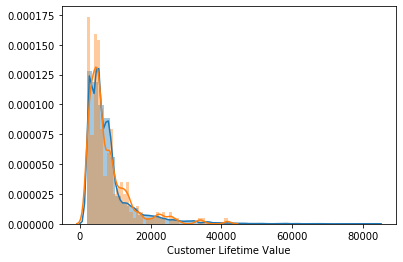

In [81]:
sns.distplot(yes)
sns.distplot(no)

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same for both males and females.

In [78]:
stats.mannwhitneyu(yes,no)

MannwhitneyuResult(statistic=5060988.0, pvalue=0.2584436122645599)

p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [84]:
male=df[df['Gender']=='M']['Customer Lifetime Value']
female=df[df['Gender']=='F']['Customer Lifetime Value']

In [85]:
stats.mannwhitneyu(male,female)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.24374651528224917)

p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget

- H0:the mean ranks of the groups are the same.
- H1:the mean ranks of the groups are not the same.

In [72]:
ca=df[df['State']=='California']['Customer Lifetime Value']
Or=df[df['State']=='Oregon']['Customer Lifetime Value']
Ar=df[df['State']=='Arizona']['Customer Lifetime Value']
Ne=df[df['State']=='Nevada']['Customer Lifetime Value']
Wa=df[df['State']=='Washington']['Customer Lifetime Value']

In [86]:
stats.kruskal(ca,Or,Ar,Ne,Wa)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)

p-value > 0.05 failed to reject H0

In [87]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

In [88]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [89]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

In [90]:
stats.kruskal(Ba,Ex,Pr)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

p-value < 0.05 to reject H0

In [91]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

In [92]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [93]:
stats.kruskal(Ba,Co,Hi,Ma,Da)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)

p-value < 0.05 reject H0

In [ ]:
Categorical_cols_Stat=pd.DataFrame(data=[F_stat,P_Val],columns=num_cols,
             index=["F_stat","P_value"]).T.sort_values("P_value")

## Data Preprocessing

## Model Building

In [10]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')